In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from datetime import datetime
import random
import seaborn as sns

In [8]:
with open('data/yahoo/merged_financials.json', 'r') as json_file:
    yahoo_financials_json = json.load(json_file)

In [9]:
tickers = list(yahoo_financials_json.keys())

tickers[:10]

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']

In [10]:
statement_types = list(yahoo_financials_json[tickers[0]].keys())

statement_types

['quarterly_income',
 'quarterly_balance',
 'quarterly_cashflow',
 'annual_income',
 'annual_balance',
 'annual_cashflow']

In [11]:
timetamps = [list(i.keys())[0] for i in yahoo_financials_json[tickers[0]][statement_types[0]]]
timetamps

['1690754400', '1667170800', '1675119600', '1682805600', '1635631200']

In [12]:
# Get a set of all position types present in statements by statement type
position_types_by_statement_type = {}
for type in statement_types:
    position_types_by_statement_type[type] = set()

for ticker in tickers:
    for statement_type in statement_types:
        statements = yahoo_financials_json[ticker][statement_type]
        for statement in statements:
            for position_type in list(statement.values())[0].keys():
                position_types_by_statement_type[statement_type] |= {position_type}

random.sample(position_types_by_statement_type[statement_types[0]], 10)

<ipython-input-12-5e7acb75221f>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(position_types_by_statement_type[statement_types[0]], 10)


['netIncomeFromContinuingAndDiscontinuedOperation',
 'rentAndLandingFees',
 'otherIncomeExpense',
 'gainOnSaleOfBusiness',
 'earningsFromEquityInterest',
 'interestIncomeNonOperating',
 'taxEffectOfUnusualItems',
 'totalUnusualItemsExcludingGoodwill',
 'minorityInterests',
 'totalExpenses']

In [13]:
# Count occurences of each position type in statemens
position_occurences = {}
for statement_type in statement_types:
    position_occurences[statement_type] = {}
    for position_type in position_types_by_statement_type[statement_type]:
        position_occurences[statement_type][position_type] = 0

for ticker in tickers:
    for statement_type in statement_types:
        statements = yahoo_financials_json[ticker][statement_type]
        for statement in statements:
            for position_type in list(statement.values())[0].keys():
                position_occurences[statement_type][position_type] += 1

random.sample(position_occurences[statement_types[0]].items(), 10)

<ipython-input-13-ba9f3f2726e1>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(position_occurences[statement_types[0]].items(), 10)


[('netIncomeDiscontinuousOperations', 299),
 ('basicEPS', 2409),
 ('operatingRevenue', 2405),
 ('earningsFromEquityInterestNetOfTax', 289),
 ('totalRevenue', 2405),
 ('amortizationOfIntangiblesIncomeStatement', 517),
 ('reconciledCostOfRevenue', 2149),
 ('preferredStockDividends', 330),
 ('operatingExpense', 2167),
 ('gainOnSaleOfBusiness', 328)]

In [14]:
# For each statement type get a list of position types sorted by their occurence
position_occurences_sorted = {}
for statement_type in statement_types:
    position_occurences_sorted[statement_type] = sorted(position_occurences[statement_type].items(), key=lambda x: x[1], reverse=True)

for statement_type in statement_types:
    print(statement_type)
    for position_type, occurence in position_occurences_sorted[statement_type]:
        print(f'\t{occurence}:\t {position_type}')
    print()

quarterly_income
	2411:	 dilutedAverageShares
	2411:	 basicAverageShares
	2409:	 basicEPS
	2409:	 dilutedEPS
	2405:	 netIncomeIncludingNoncontrollingInterests
	2405:	 netIncome
	2405:	 normalizedIncome
	2405:	 taxEffectOfUnusualItems
	2405:	 netIncomeFromContinuingOperationNetMinorityInterest
	2405:	 netIncomeFromContinuingAndDiscontinuedOperation
	2405:	 dilutedNIAvailtoComStockholders
	2405:	 netIncomeCommonStockholders
	2405:	 totalRevenue
	2405:	 taxRateForCalcs
	2405:	 pretaxIncome
	2405:	 netIncomeContinuousOperations
	2405:	 operatingRevenue
	2374:	 taxProvision
	2362:	 netInterestIncome
	2330:	 reconciledDepreciation
	2273:	 totalExpenses
	2269:	 ebit
	2230:	 netNonOperatingInterestIncomeExpense
	2200:	 interestExpense
	2174:	 normalizedEBITDA
	2174:	 eBITDA
	2174:	 operatingIncome
	2167:	 operatingExpense
	2149:	 grossProfit
	2149:	 reconciledCostOfRevenue
	2149:	 costOfRevenue
	2137:	 sellingGeneralAndAdministration
	2122:	 otherIncomeExpense
	2068:	 interestExpenseNonOperati

In [15]:
# For each statement type get a list of position types sorted by their occurence
position_occurences_sorted = {}
for statement_type in statement_types:
    position_occurences_sorted[statement_type] = sorted(position_occurences[statement_type].items(), key=lambda x: x[0], reverse=True)

for statement_type in statement_types:
    print(statement_type)
    for position_type, occurence in position_occurences_sorted[statement_type]:
        print(f'\t{occurence}:\t {position_type}')
    print()

quarterly_income
	244:	 writeOff
	1862:	 totalUnusualItemsExcludingGoodwill
	1862:	 totalUnusualItems
	2405:	 totalRevenue
	332:	 totalOtherFinanceCost
	1770:	 totalOperatingIncomeAsReported
	2273:	 totalExpenses
	2405:	 taxRateForCalcs
	2374:	 taxProvision
	2405:	 taxEffectOfUnusualItems
	1583:	 specialIncomeCharges
	2137:	 sellingGeneralAndAdministration
	535:	 sellingAndMarketingExpense
	4:	 securitiesAmortization
	350:	 salariesAndWages
	869:	 restructuringAndMergernAcquisition
	741:	 researchAndDevelopment
	159:	 rentExpenseSupplemental
	64:	 rentAndLandingFees
	2330:	 reconciledDepreciation
	2149:	 reconciledCostOfRevenue
	63:	 provisionForDoubtfulAccounts
	2405:	 pretaxIncome
	330:	 preferredStockDividends
	322:	 otherunderPreferredStockDividend
	215:	 otherTaxes
	513:	 otherSpecialCharges
	770:	 otherOperatingExpenses
	1825:	 otherNonOperatingIncomeExpenses
	2122:	 otherIncomeExpense
	815:	 otherGandA
	2405:	 operatingRevenue
	2174:	 operatingIncome
	2167:	 operatingExpense
	24

In [16]:
position_types_selected_for_analysis = {}
position_types_selected_for_analysis['quarterly_income'] = [
    'totalRevenue',
    'totalExpenses',
    'grossProfit',
    'netIncome',
    'ebit',
    'eBITDA',
    'operatingRevenue',
    'operatingIncome',
    'dilutedEPS',
]
position_types_selected_for_analysis['quarterly_balance'] = [
    'totalAssets',
    'totalLiabilitiesNetMinorityInterest',
    'totalDebt',
    'ordinarySharesNumber',
    'commonStockEquity',
    'tangibleBookValue',
    'investedCapital',
]
position_types_selected_for_analysis['quarterly_cashflow'] = [
    'operatingCashFlow',
    'investingCashFlow',
    'financingCashFlow',
    'freeCashFlow',
]
position_types_selected_for_analysis['annual_income'] = [
    'totalRevenue',
    'totalExpenses',
    'grossProfit',
    'netIncome',
    'ebit',
    'eBITDA',
    'operatingRevenue',
    'operatingIncome',
    'dilutedEPS',
]
position_types_selected_for_analysis['annual_balance'] = [
    'totalAssets',
    'totalLiabilitiesNetMinorityInterest',
    'totalDebt',
    'ordinarySharesNumber',
    'commonStockEquity',
    'tangibleBookValue',
    'investedCapital',
]
position_types_selected_for_analysis['annual_cashflow'] = [
    'operatingCashFlow',
    'investingCashFlow',
    'financingCashFlow',
    'freeCashFlow',
]


In [17]:
# Filter out statements missing position types selected for analysis
yahoo_financials_complete = {}
for ticker in tickers:
    yahoo_financials_complete[ticker] = {}
    for statement_type in statement_types:
        yahoo_financials_complete[ticker][statement_type] = []
        for statement in yahoo_financials_json[ticker][statement_type]:
            complete = True
            for position_type in position_types_selected_for_analysis[statement_type]:
                if position_type not in list(statement.values())[0].keys():
                    complete = False
                    break
            if complete:
                yahoo_financials_complete[ticker][statement_type].append(statement)

In [18]:
# Filter out positions not selected for analysis
yahoo_financials_selected = {}
for ticker in tickers:
    yahoo_financials_selected[ticker] = {}
    for statement_type in statement_types:
        yahoo_financials_selected[ticker][statement_type] = []
        for statement in yahoo_financials_complete[ticker][statement_type]:
            timestamp = list(statement.keys())[0]
            positions = {position_type: list(statement.values())[0][position_type] for position_type in position_types_selected_for_analysis[statement_type]}
            yahoo_financials_selected[ticker][statement_type].append({
                timestamp: positions
            })

In [19]:
file_path = f'data/yahoo/merged_selected_financials.json'
with open(file_path, 'w') as json_file:
    json.dump(yahoo_financials_selected, json_file, indent=4)

In [20]:
# Insert finance data to pandas dataframes
quarterly_income_df = pd.DataFrame()
quarterly_balance_df = pd.DataFrame()
quarterly_cashflow_df = pd.DataFrame()
annual_income_df = pd.DataFrame()
annual_balance_df = pd.DataFrame()
annual_cashflow_df = pd.DataFrame()

for ticker in tickers:
    for statement in yahoo_financials_complete[ticker]['quarterly_income']:
        for timestamp in statement:
          quarterly_income_df = pd.concat([quarterly_income_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['quarterly_balance']:
        for timestamp in statement:
          quarterly_balance_df = pd.concat([quarterly_balance_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['quarterly_cashflow']:
        for timestamp in statement:
          quarterly_cashflow_df = pd.concat([quarterly_cashflow_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['annual_income']:
        for timestamp in statement:
          annual_income_df = pd.concat([annual_income_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['annual_balance']:
        for timestamp in statement:
          annual_balance_df = pd.concat([annual_balance_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['annual_cashflow']:
        for timestamp in statement:
          annual_cashflow_df = pd.concat([annual_cashflow_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)

In [21]:
quarterly_income_df

,totalExpenses,netNonOperatingInterestIncomeExpense,taxRateForCalcs,reconciledCostOfRevenue,interestExpenseNonOperating,netInterestIncome,otherNonOperatingIncomeExpenses,costOfRevenue,eBITDA,ebit,...,netIncomeDiscontinuousOperations,depreciationIncomeStatement,rentAndLandingFees,preferredStockDividends,exciseTaxes,insuranceAndClaims,depletionIncomeStatement,netIncomeExtraordinary,netIncomeFromTaxLossCarryforward,securitiesAmortization
0,1.539000e+09,-11000000.0,0.175400,1.014000e+09,96000000.0,-57000000.0,18000000.0,3.432000e+09,2.270000e+08,1.470000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.378000e+09,-18000000.0,0.141200,8.370000e+08,23000000.0,-18000000.0,2000000.0,8.370000e+08,5.510000e+08,4.780000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.330000e+09,-16000000.0,0.137500,7.880000e+08,25000000.0,-16000000.0,NaN,7.880000e+08,5.020000e+08,4.350000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.334000e+09,-12000000.0,0.137500,7.930000e+08,24000000.0,-12000000.0,6000000.0,7.930000e+08,4.720000e+08,4.010000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.253200e+10,-429000000.0,0.265957,1.063800e+10,499000000.0,-429000000.0,157000000.0,1.063800e+10,1.157000e+09,1.157000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,1.279000e+09,-40000000.0,0.208000,5.290000e+08,53000000.0,-40000000.0,2000000.0,6.070000e+08,8.350000e+08,7.200000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,1.350000e+09,-62000000.0,0.222973,6.530000e+08,62000000.0,-62000000.0,-34000000.0,6.530000e+08,6.890000e+08,6.540000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2143,1.272000e+09,-63000000.0,0.209469,5.880000e+08,63000000.0,-63000000.0,53000000.0,5.880000e+08,7.970000e+08,7.600000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2144,1.346000e+09,-58000000.0,0.231651,6.070000e+08,58000000.0,-58000000.0,104000000.0,6.070000e+08,9.670000e+08,9.300000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
qi_corr = quarterly_income_df[position_types_selected_for_analysis['quarterly_income']].corr()
qb_corr = quarterly_balance_df[position_types_selected_for_analysis['quarterly_balance']].corr()
qc_corr = quarterly_cashflow_df[position_types_selected_for_analysis['quarterly_cashflow']].corr()

In [23]:
ai_corr = annual_income_df[position_types_selected_for_analysis['annual_income']].corr()
ab_corr = annual_balance_df[position_types_selected_for_analysis['annual_balance']].corr()
ac_corr = annual_cashflow_df[position_types_selected_for_analysis['annual_cashflow']].corr()

In [24]:
qi_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS
totalRevenue,1.000000,0.786097,0.748089,0.519053,0.405488,0.690730,0.664637,0.611641,0.021518
totalExpenses,0.786097,1.000000,0.537671,0.352090,0.491304,0.552521,0.790088,0.429540,0.041454
grossProfit,0.748089,0.537671,1.000000,0.766035,0.549811,0.791273,0.566197,0.764460,0.045118
netIncome,0.519053,0.352090,0.766035,1.000000,0.657444,0.819367,0.418636,0.818371,0.106569
ebit,0.405488,0.491304,0.549811,0.657444,1.000000,0.768954,0.632766,0.747267,0.097497
eBITDA,0.690730,0.552521,0.791273,0.819367,0.768954,1.000000,0.623670,0.921922,0.073920
operatingRevenue,0.664637,0.790088,0.566197,0.418636,0.632766,0.623670,1.000000,0.528023,0.054288
operatingIncome,0.611641,0.429540,0.764460,0.818371,0.747267,0.921922,0.528023,1.000000,0.043491
dilutedEPS,0.021518,0.041454,0.045118,0.106569,0.097497,0.073920,0.054288,0.043491,1.000000


In [25]:
ai_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS
totalRevenue,1.000000,0.990704,0.813626,0.597518,0.595692,0.676357,0.998986,0.590603,0.010349
totalExpenses,0.990704,1.000000,0.741666,0.493675,0.509051,0.594759,0.989271,0.497749,0.003853
grossProfit,0.813626,0.741666,1.000000,0.839085,0.775312,0.838235,0.814446,0.780855,0.015896
netIncome,0.597518,0.493675,0.839085,1.000000,0.857161,0.857209,0.599041,0.814994,0.079662
ebit,0.595692,0.509051,0.775312,0.857161,1.000000,0.972247,0.597199,0.968660,0.058125
eBITDA,0.676357,0.594759,0.838235,0.857209,0.972247,1.000000,0.677519,0.946982,0.040839
operatingRevenue,0.998986,0.989271,0.814446,0.599041,0.597199,0.677519,1.000000,0.592113,0.010258
operatingIncome,0.590603,0.497749,0.780855,0.814994,0.968660,0.946982,0.592113,1.000000,0.034877
dilutedEPS,0.010349,0.003853,0.015896,0.079662,0.058125,0.040839,0.010258,0.034877,1.000000


In [26]:
qb_corr

,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital
totalAssets,1.000000,0.993646,0.897870,0.356217,0.142182,0.111502,0.300916
totalLiabilitiesNetMinorityInterest,0.993646,1.000000,0.886261,0.300038,0.129028,0.103622,0.286549
totalDebt,0.897870,0.886261,1.000000,0.426152,0.114119,0.066152,0.288225
ordinarySharesNumber,0.356217,0.300038,0.426152,1.000000,0.106948,0.064169,0.174800
commonStockEquity,0.142182,0.129028,0.114119,0.106948,1.000000,0.994074,0.983508
tangibleBookValue,0.111502,0.103622,0.066152,0.064169,0.994074,1.000000,0.969348
investedCapital,0.300916,0.286549,0.288225,0.174800,0.983508,0.969348,1.000000


In [27]:
ab_corr

,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital
totalAssets,1.000000,0.993785,0.877219,0.362107,0.697378,0.590850,0.873100
totalLiabilitiesNetMinorityInterest,0.993785,1.000000,0.864340,0.308454,0.614202,0.531965,0.821495
totalDebt,0.877219,0.864340,1.000000,0.436267,0.655181,0.420385,0.902793
ordinarySharesNumber,0.362107,0.308454,0.436267,1.000000,0.585300,0.396504,0.548163
commonStockEquity,0.697378,0.614202,0.655181,0.585300,1.000000,0.781280,0.905083
tangibleBookValue,0.590850,0.531965,0.420385,0.396504,0.781280,1.000000,0.660928
investedCapital,0.873100,0.821495,0.902793,0.548163,0.905083,0.660928,1.000000


In [28]:
qc_corr

,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
operatingCashFlow,1.000000,-0.309378,-0.518932,0.815778
investingCashFlow,-0.309378,1.000000,-0.071195,-0.278940
financingCashFlow,-0.518932,-0.071195,1.000000,-0.473130
freeCashFlow,0.815778,-0.278940,-0.473130,1.000000


In [29]:
ac_corr

,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
operatingCashFlow,1.000000,-0.281796,-0.349815,0.927824
investingCashFlow,-0.281796,1.000000,-0.608470,-0.206715
financingCashFlow,-0.349815,-0.608470,1.000000,-0.369559
freeCashFlow,0.927824,-0.206715,-0.369559,1.000000


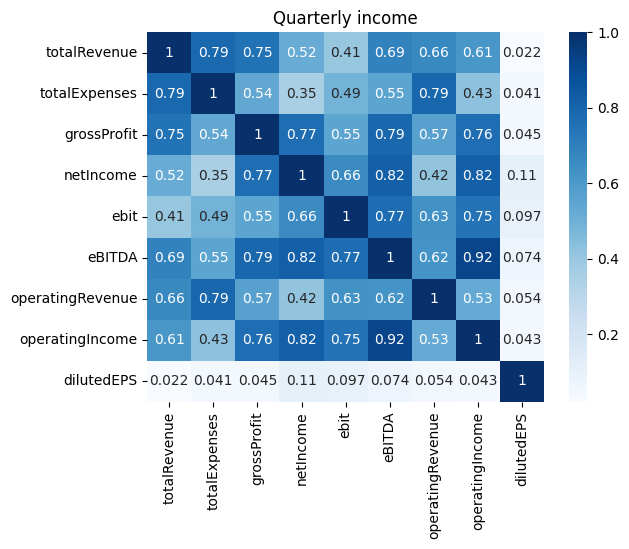

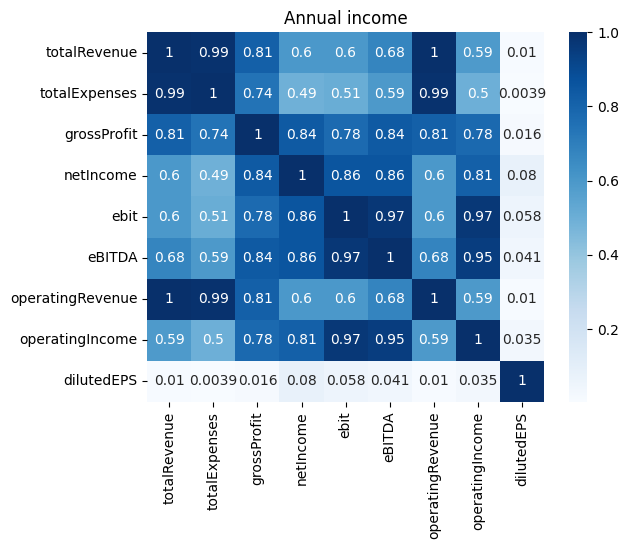

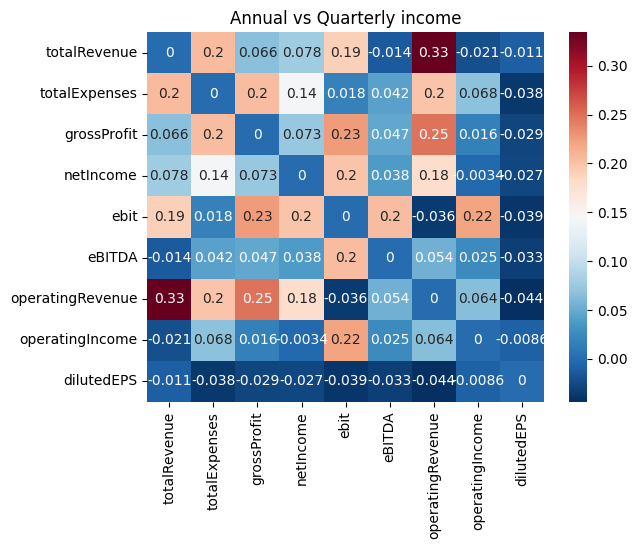

In [30]:
sns.heatmap(qi_corr, annot=True, cmap="Blues")
plt.title("Quarterly income")
plt.show()

sns.heatmap(ai_corr, annot=True, cmap="Blues")
plt.title("Annual income")
plt.show()

i_diff = ai_corr - qi_corr
sns.heatmap(i_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly income")
plt.show()

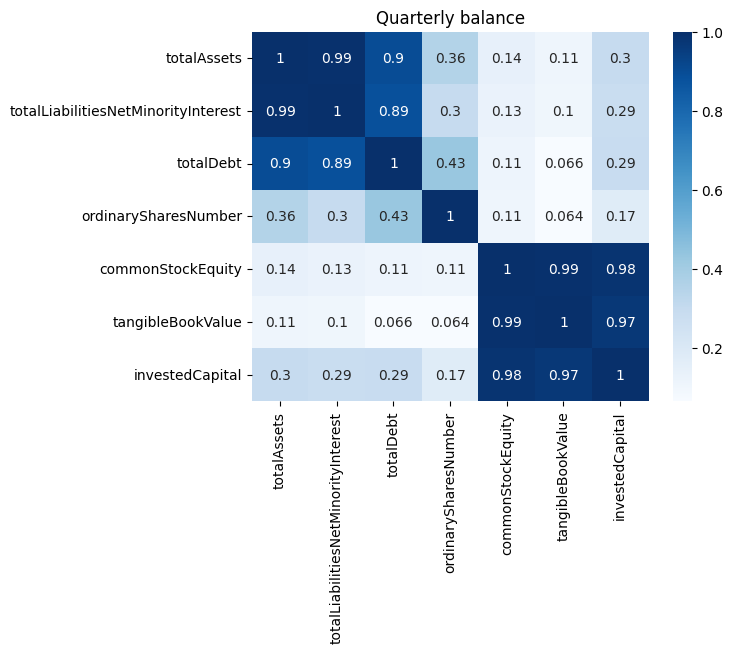

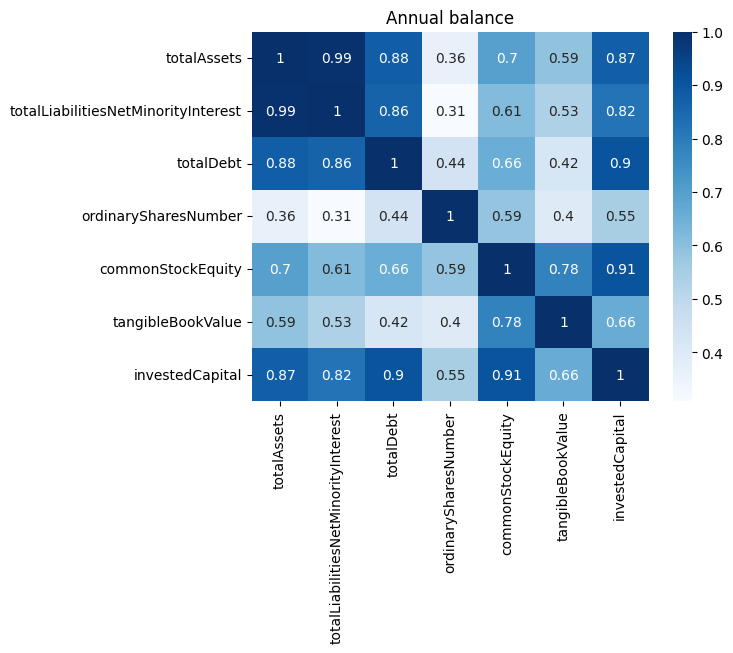

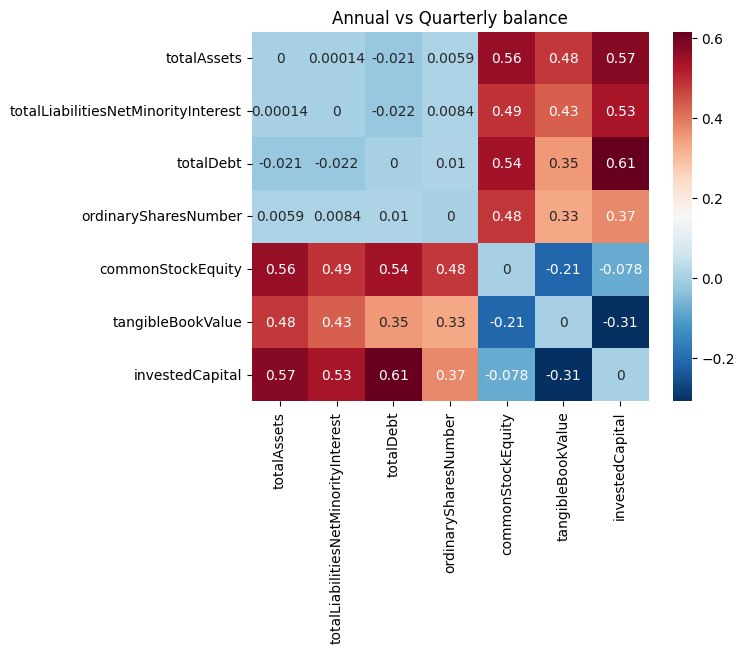

In [31]:
sns.heatmap(qb_corr, annot=True, cmap="Blues")
plt.title("Quarterly balance")
plt.show()

sns.heatmap(ab_corr, annot=True, cmap="Blues")
plt.title("Annual balance")
plt.show()

b_diff = ab_corr - qb_corr
sns.heatmap(b_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly balance")
plt.show()

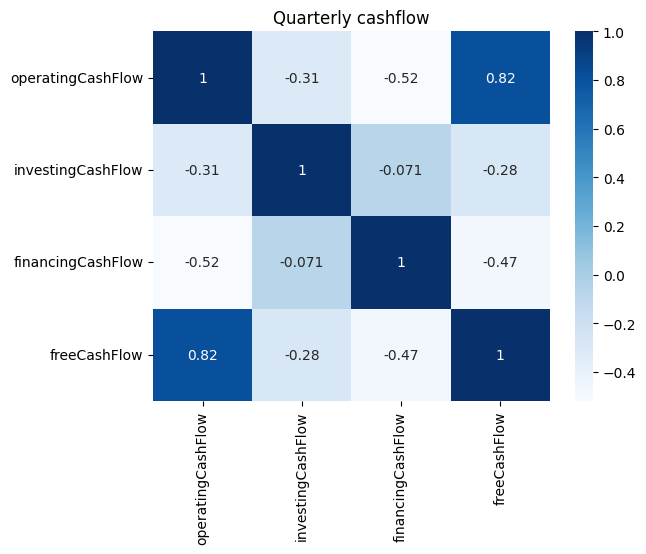

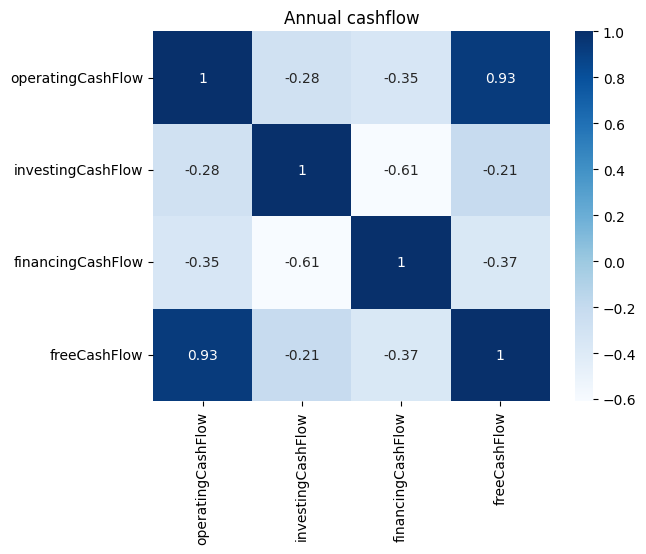

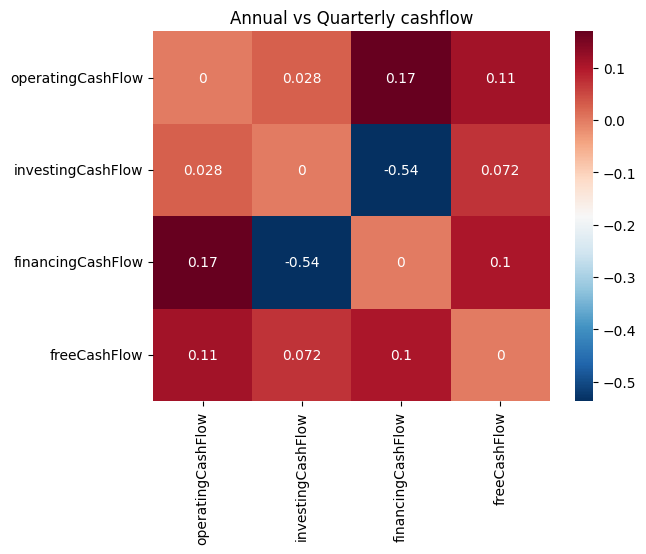

In [32]:
sns.heatmap(qc_corr, annot=True, cmap="Blues")
plt.title("Quarterly cashflow")
plt.show()

sns.heatmap(ac_corr, annot=True, cmap="Blues")
plt.title("Annual cashflow")
plt.show()

c_diff = ac_corr - qc_corr
sns.heatmap(c_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly cashflow")
plt.show()

In [33]:
# Łączenie kategorii do jednego datasetu (20s)

quarter_df = pd.DataFrame()
annual_df = pd.DataFrame()

for ticker in tickers:
    for statement in yahoo_financials_complete[ticker]['quarterly_income']:
      for timestamp in statement:
        rec_df = pd.DataFrame()

        rec_df['timestamp'] = [timestamp]
        rec_df['ticker'] = [ticker]
        for pos in position_types_selected_for_analysis['quarterly_income']:
          rec_df[pos] = [statement[timestamp].get(pos)]

        for rec in yahoo_financials_complete[ticker]['quarterly_balance']:
          for time in rec:
            if time == timestamp:
              for pos in position_types_selected_for_analysis['quarterly_balance']:
                rec_df[pos] = [rec[time].get(pos)]

        for rec in yahoo_financials_complete[ticker]['quarterly_cashflow']:
          for time in rec:
            if time == timestamp:
              for pos in position_types_selected_for_analysis['quarterly_cashflow']:
                rec_df[pos] = [rec[time].get(pos)]

        quarter_df = pd.concat([quarter_df, rec_df], ignore_index=True)

    for statement in yahoo_financials_complete[ticker]['annual_income']:
        for timestamp in statement:
          rec_df = pd.DataFrame()

          rec_df['timestamp'] = [timestamp]
          rec_df['ticker'] = [ticker]
          for pos in position_types_selected_for_analysis['annual_income']:
            rec_df[pos] = [statement[timestamp].get(pos)]

          for rec in yahoo_financials_complete[ticker]['annual_balance']:
            for time in rec:
              if time == timestamp:
                for pos in position_types_selected_for_analysis['annual_balance']:
                  rec_df[pos] = [rec[time].get(pos)]
          for rec in yahoo_financials_complete[ticker]['annual_cashflow']:
            for time in rec:
              if time == timestamp:
                for pos in position_types_selected_for_analysis['annual_cashflow']:
                  rec_df[pos] = [rec[time].get(pos)]
          annual_df = pd.concat([annual_df, rec_df], ignore_index=True)


In [34]:
print(quarter_df)

       timestamp ticker  totalRevenue  totalExpenses   grossProfit  \
0     1690754400      A  1.672000e+09   1.539000e+09  6.580000e+08   
1     1667170800      A  1.849000e+09   1.378000e+09  1.012000e+09   
2     1675119600      A  1.756000e+09   1.330000e+09  9.680000e+08   
3     1682805600      A  1.717000e+09   1.334000e+09  9.240000e+08   
4     1664488800    AAL  1.346200e+10   1.253200e+10  2.824000e+09   
...          ...    ...           ...            ...           ...   
2141  1664488800    ZTS  2.002000e+09   1.279000e+09  1.395000e+09   
2142  1672441200    ZTS  2.040000e+09   1.350000e+09  1.387000e+09   
2143  1680213600    ZTS  2.000000e+09   1.272000e+09  1.412000e+09   
2144  1688076000    ZTS  2.180000e+09   1.346000e+09  1.573000e+09   
2145  1696024800    ZTS  2.151000e+09   1.353000e+09  5.885000e+09   

        netIncome          ebit        eBITDA  operatingRevenue  \
0     111000000.0  1.470000e+09  2.270000e+08      1.672000e+09   
1     368000000.0  4.7800

In [35]:
quarter_corr = quarter_df[2:].corr()
annual_corr = annual_df[2:].corr()

<ipython-input-35-1dc2a75af17e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quarter_corr = quarter_df[2:].corr()
<ipython-input-35-1dc2a75af17e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  annual_corr = annual_df[2:].corr()


In [36]:
quarter_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
totalRevenue,1.000000,0.786079,0.748069,0.519031,0.405484,0.690708,0.664607,0.611620,0.021523,0.573442,0.565636,0.432907,0.513672,0.465801,0.347727,0.498328,0.501631,-0.318632,-0.279658,0.461284
totalExpenses,0.786079,1.000000,0.537629,0.352056,0.491306,0.552484,0.790066,0.429505,0.041459,0.569666,0.539432,0.406913,0.452074,0.497573,0.376866,0.500098,0.627389,-0.368400,-0.307414,0.447910
grossProfit,0.748069,0.537629,1.000000,0.766027,0.549818,0.791257,0.566154,0.764449,0.045127,0.642958,0.598278,0.487452,0.651056,0.571949,0.316505,0.610689,0.629968,-0.295833,-0.429692,0.701095
netIncome,0.519031,0.352056,0.766027,1.000000,0.657450,0.819361,0.418604,0.818364,0.106579,0.478577,0.434231,0.307797,0.604307,0.455616,0.375216,0.456987,0.535032,-0.156117,-0.398472,0.687139
ebit,0.405484,0.491306,0.549818,0.657450,1.000000,0.768970,0.632781,0.747278,0.097479,0.606943,0.498707,0.364511,0.670706,0.646189,0.513422,0.611458,0.833425,-0.294260,-0.611783,0.695321
eBITDA,0.690708,0.552484,0.791257,0.819361,0.768970,1.000000,0.623637,0.921919,0.073931,0.606691,0.544786,0.421242,0.691929,0.582023,0.441811,0.587997,0.754935,-0.308194,-0.511996,0.632591
operatingRevenue,0.664607,0.790066,0.566154,0.418604,0.632781,0.623637,1.000000,0.527994,0.054296,0.643244,0.594530,0.449842,0.539845,0.589764,0.432893,0.591437,0.669669,-0.456922,-0.371656,0.477857
operatingIncome,0.611620,0.429505,0.764449,0.818364,0.747278,0.921919,0.527994,1.000000,0.043500,0.540689,0.479250,0.353242,0.689628,0.524883,0.404556,0.524533,0.712241,-0.197604,-0.527262,0.642956
dilutedEPS,0.021523,0.041459,0.045127,0.106579,0.097479,0.073931,0.054296,0.043500,1.000000,-0.020456,-0.017083,-0.033290,-0.059514,-0.014143,0.022667,-0.022292,0.062276,-0.006399,-0.037281,0.065199
totalAssets,0.573442,0.569666,0.642958,0.478577,0.606943,0.606691,0.643244,0.540689,-0.020456,1.000000,0.941238,0.821350,0.787334,0.861293,0.389827,0.963844,0.654336,-0.521952,-0.379321,0.570464


In [37]:
annual_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital
totalRevenue,1.000000,0.990703,0.813606,0.597493,0.595663,0.676326,0.998986,0.590571,0.010296,0.720623,-0.551572,-0.496045,0.592986,0.736840,0.701631,0.569654,0.619452,0.633856,0.380936,0.663463
totalExpenses,0.990703,1.000000,0.741639,0.493642,0.509015,0.594720,0.989270,0.497709,0.003800,0.630401,-0.518342,-0.410986,0.492838,0.690869,0.665098,0.540890,0.539908,0.580728,0.353162,0.612648
grossProfit,0.813606,0.741639,1.000000,0.839078,0.775298,0.838221,0.814426,0.780840,0.015848,0.920586,-0.609509,-0.698365,0.839458,0.809775,0.728699,0.618579,0.809483,0.768869,0.342400,0.786100
netIncome,0.597493,0.493642,0.839078,1.000000,0.857154,0.857203,0.599016,0.814985,0.079631,0.911203,-0.482137,-0.763035,0.905713,0.611174,0.519797,0.383726,0.790810,0.642513,0.462333,0.601166
ebit,0.595663,0.509015,0.775298,0.857154,1.000000,0.972246,0.597171,0.968659,0.058091,0.825019,-0.481797,-0.663142,0.787009,0.617284,0.531587,0.407045,0.681263,0.631979,0.442345,0.610129
eBITDA,0.676326,0.594720,0.838221,0.857203,0.972246,1.000000,0.677488,0.946979,0.040797,0.887446,-0.588162,-0.664708,0.791592,0.738722,0.648564,0.532928,0.756201,0.732895,0.449712,0.730711
operatingRevenue,0.998986,0.989270,0.814426,0.599016,0.597171,0.677488,1.000000,0.592081,0.010204,0.721712,-0.553117,-0.496711,0.594808,0.736382,0.701969,0.570565,0.620967,0.632040,0.379210,0.663049
operatingIncome,0.590571,0.497709,0.780840,0.814985,0.968659,0.946979,0.592081,1.000000,0.034840,0.820552,-0.477649,-0.663294,0.782275,0.620259,0.536197,0.417770,0.684721,0.627476,0.404485,0.611915
dilutedEPS,0.010296,0.003800,0.015848,0.079631,0.058091,0.040797,0.010204,0.034840,1.000000,0.023933,0.015894,-0.037083,0.045027,-0.036583,-0.037412,-0.055783,-0.057783,-0.023224,0.009305,-0.042506
operatingCashFlow,0.720623,0.630401,0.920586,0.911203,0.825019,0.887446,0.721712,0.820552,0.023933,1.000000,-0.644375,-0.761347,0.917342,0.801945,0.704669,0.582521,0.892976,0.794421,0.461203,0.789585


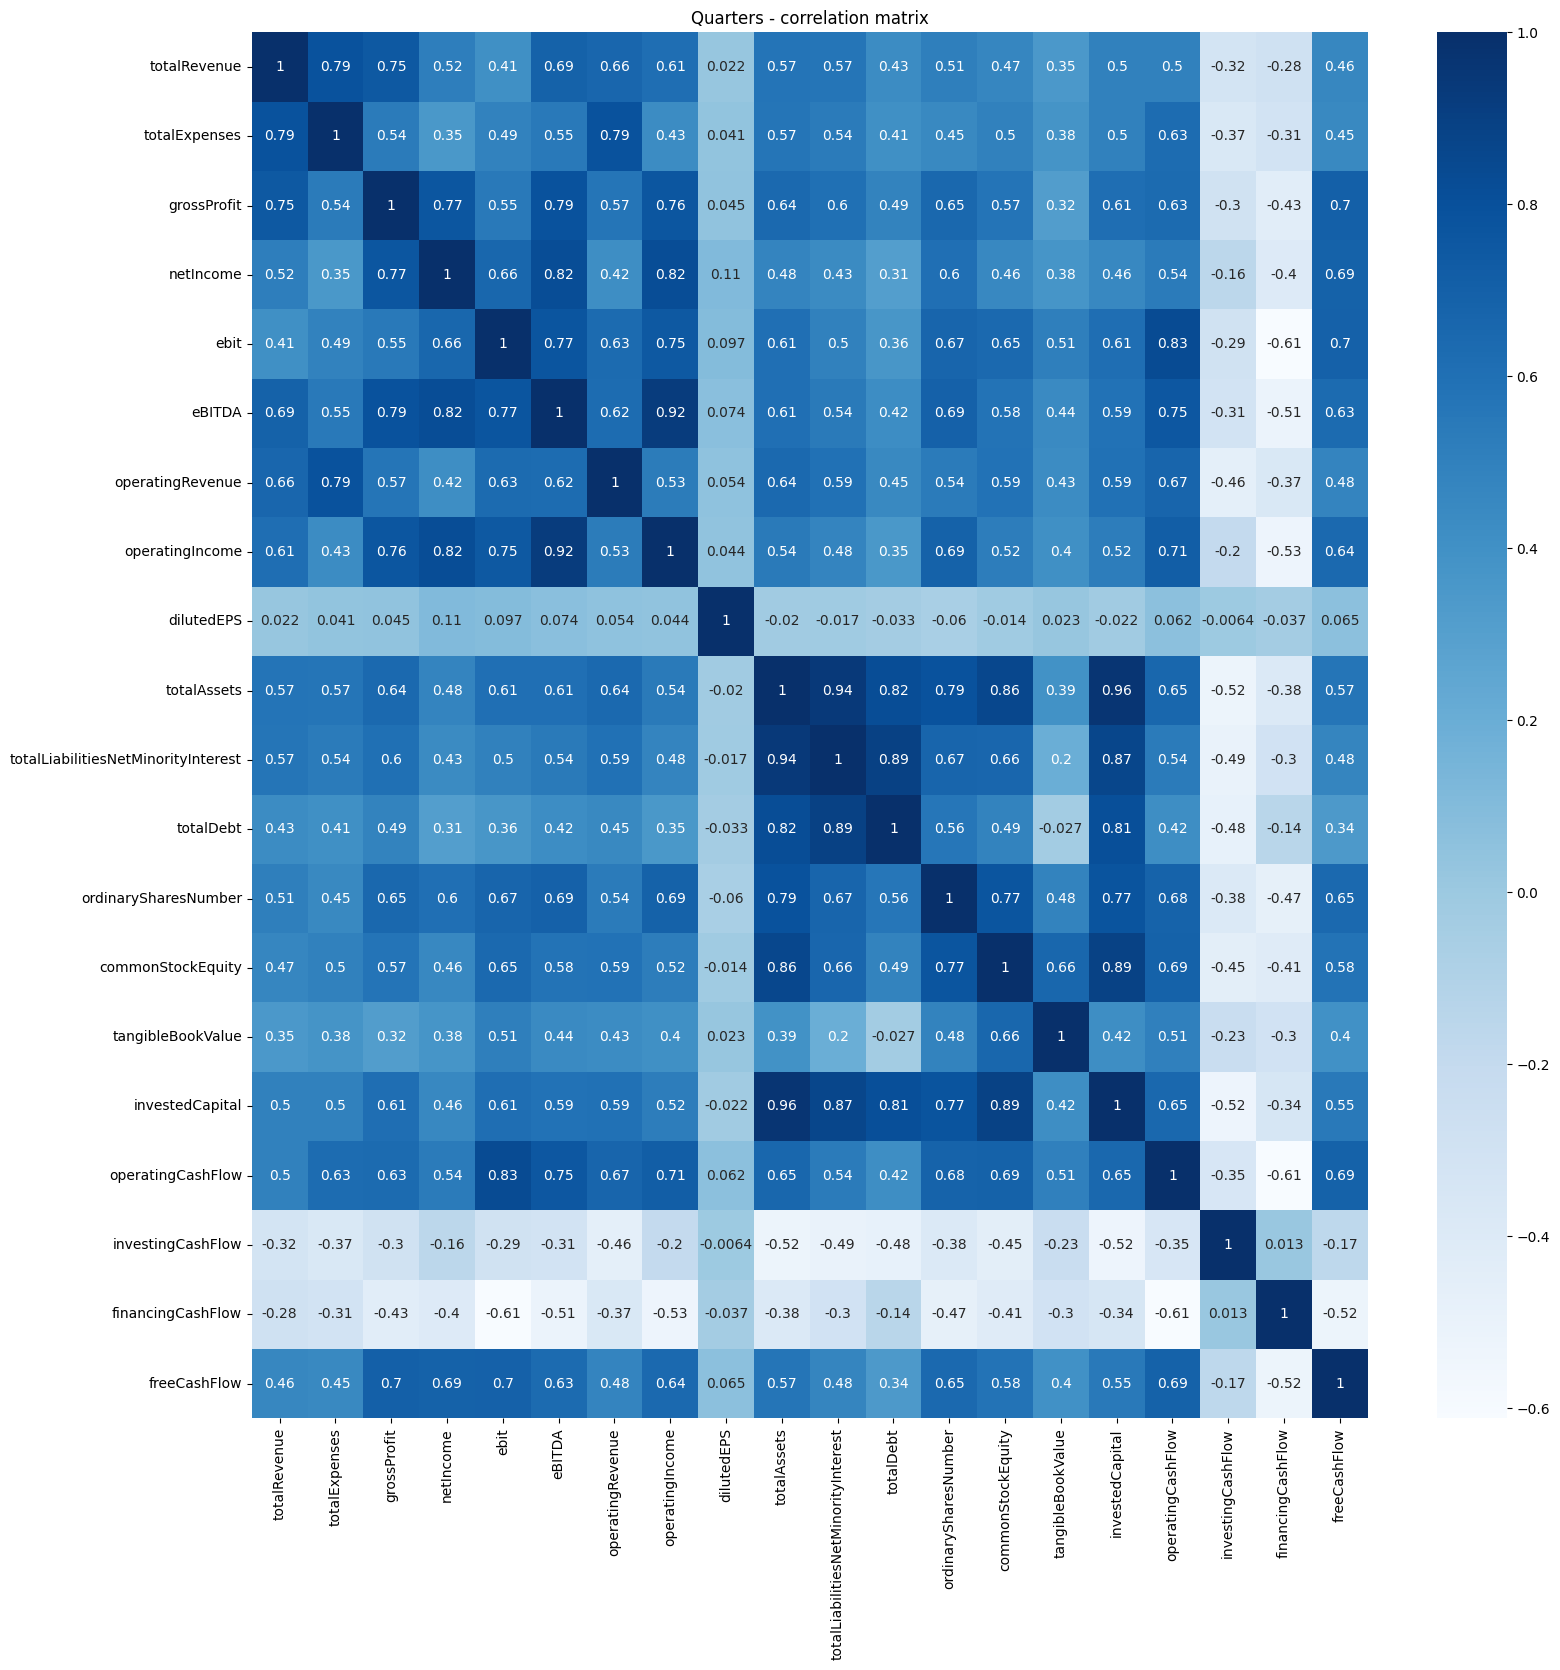

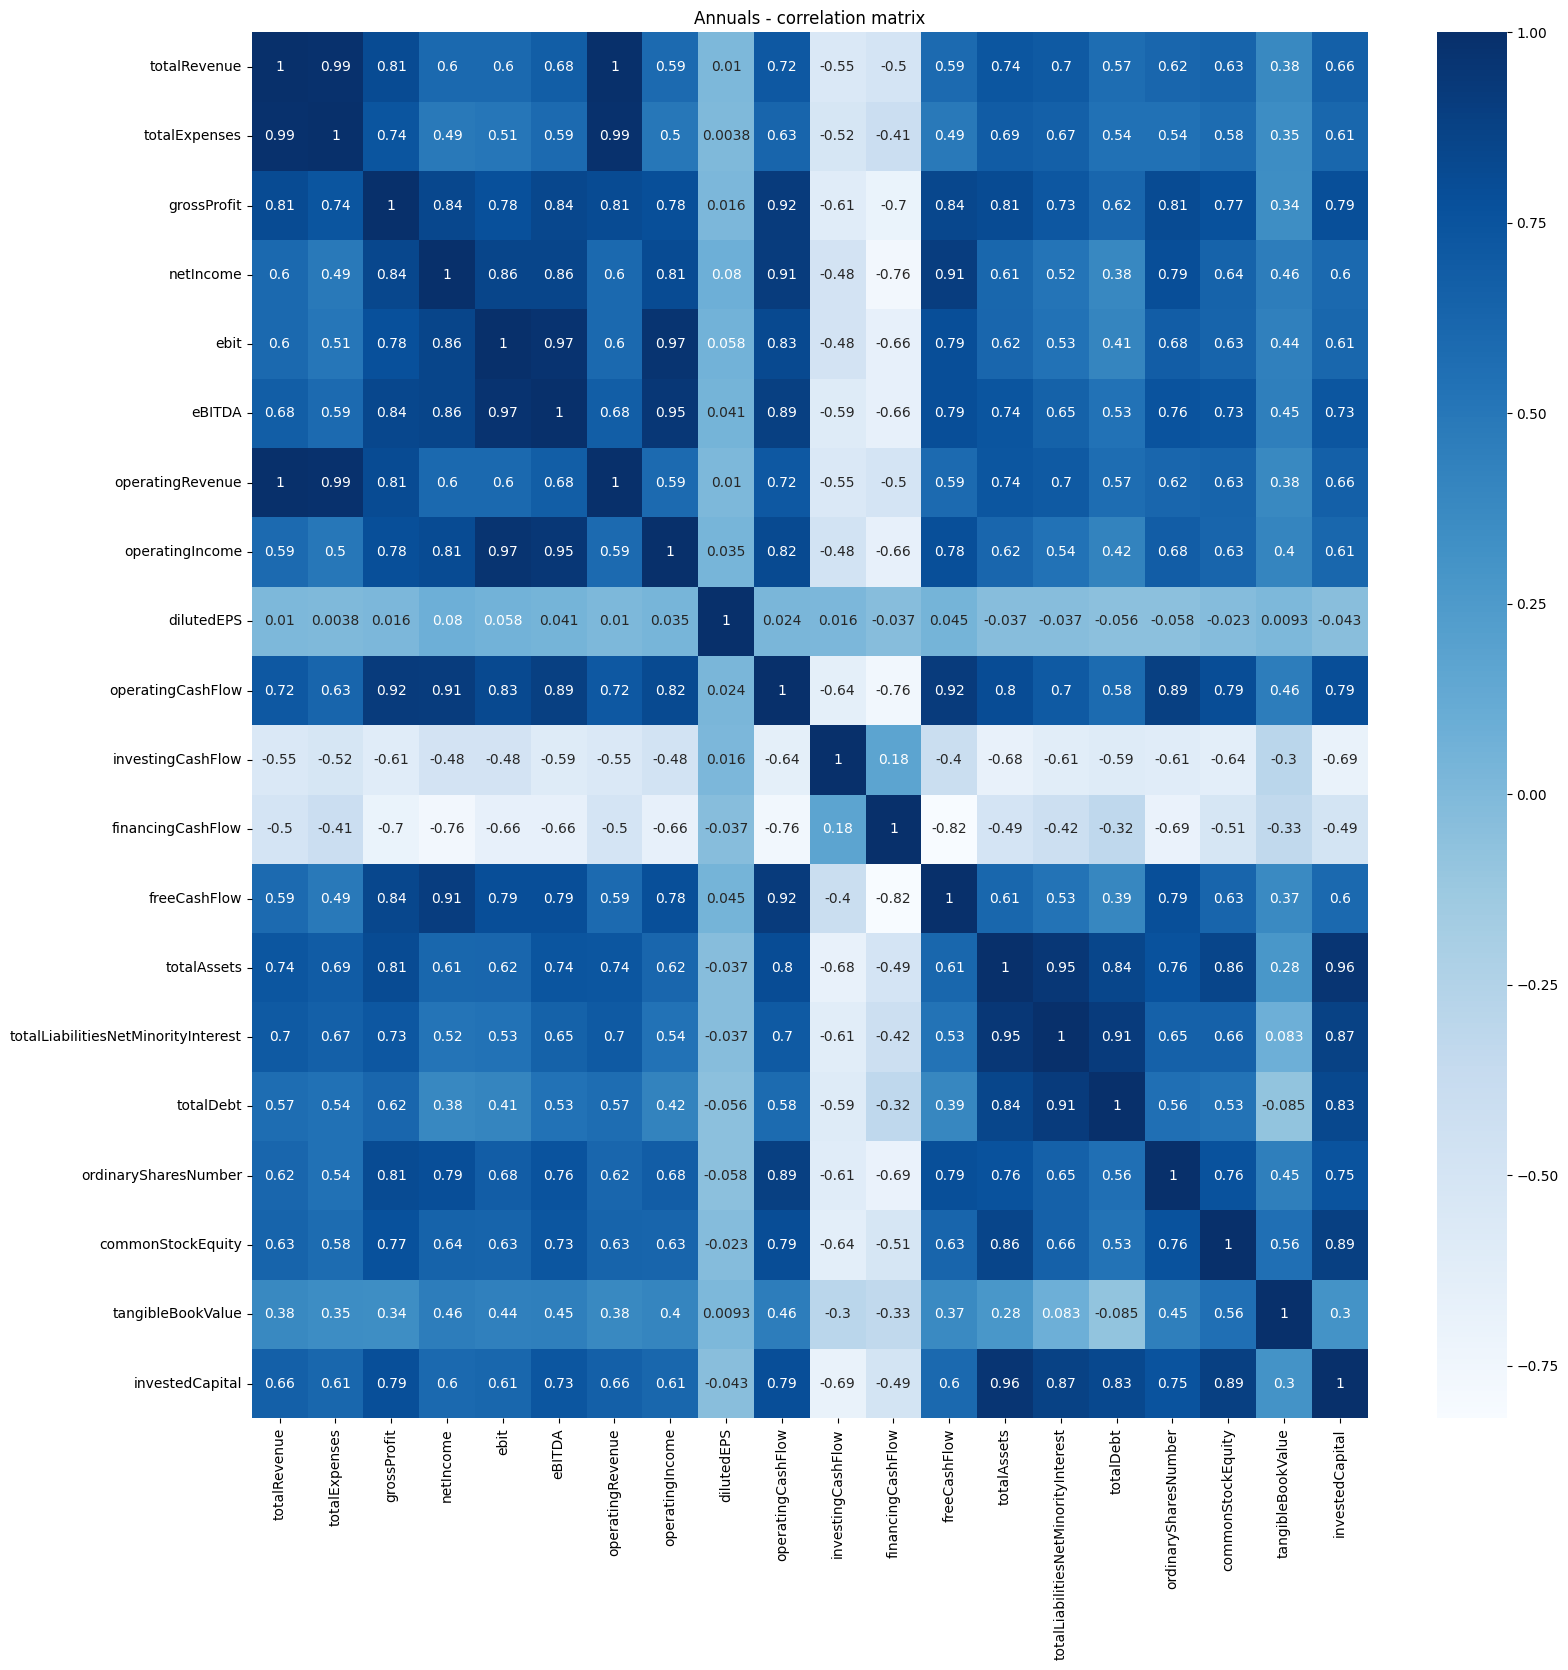

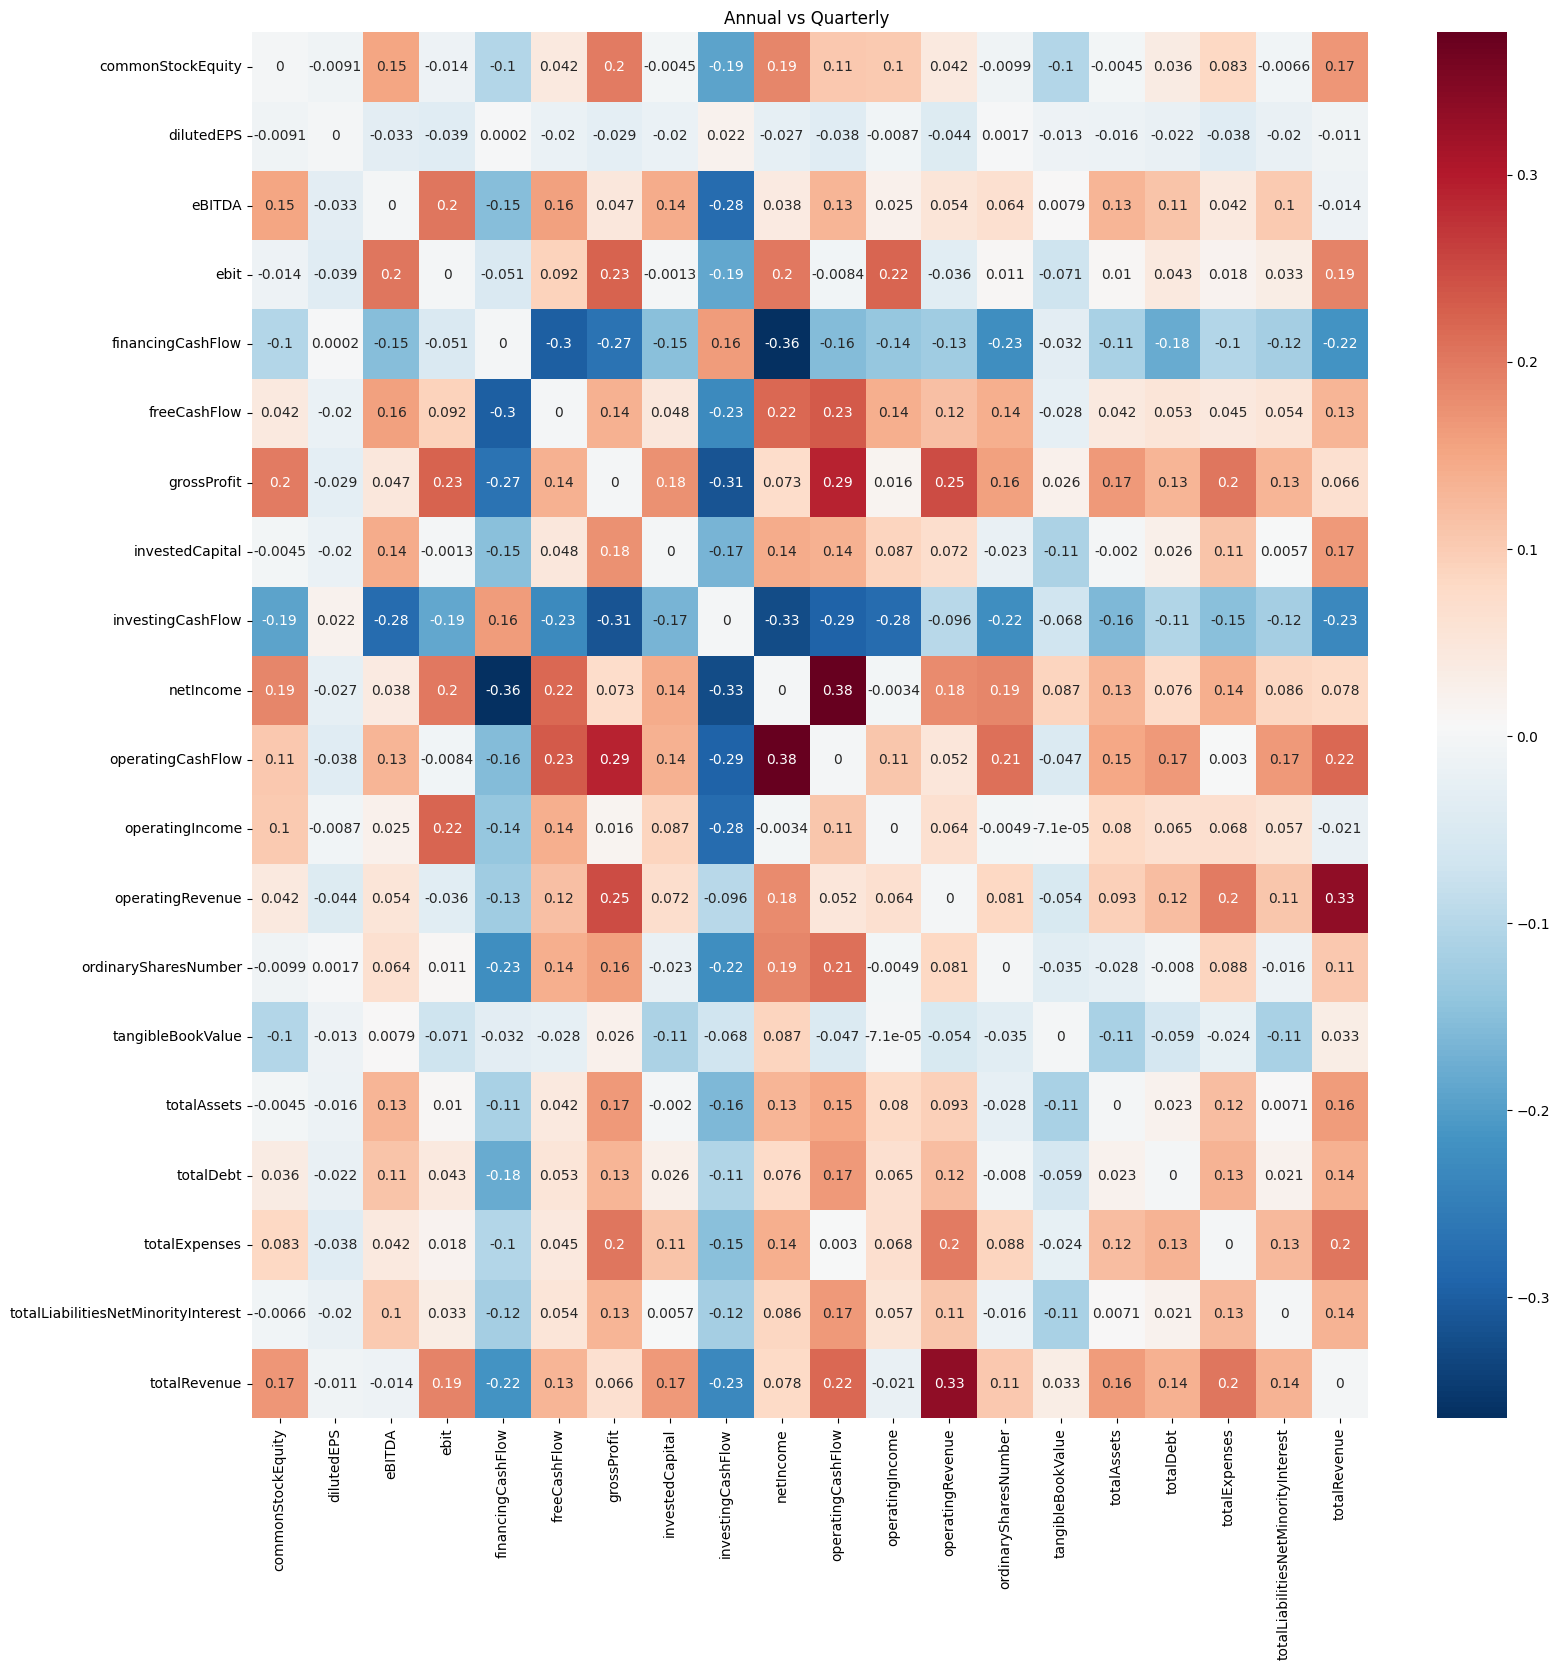

In [38]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(quarter_corr, annot=True, cmap="Blues", ax=ax)
plt.title("Quarters - correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(annual_corr, annot=True, cmap="Blues", ax=ax)
plt.title("Annuals - correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(18,18))
i_diff = annual_corr - quarter_corr
sns.heatmap(i_diff, annot=True, cmap="RdBu_r", ax=ax)
plt.title("Annual vs Quarterly ")
plt.show()

In [39]:
pip install yahoofinancials

In [40]:
quarter_df

,timestamp,ticker,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,...,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
0,1690754400,A,1.672000e+09,1.539000e+09,6.580000e+08,111000000.0,1.470000e+09,2.270000e+08,1.672000e+09,133000000.0,...,5.117000e+09,2.789000e+09,292747000.0,5.558000e+09,1.072000e+09,8.347000e+09,1.704000e+09,-89000000.0,-1.070000e+09,1.420000e+09
1,1667170800,A,1.849000e+09,1.378000e+09,1.012000e+09,368000000.0,4.780000e+08,5.510000e+08,1.849000e+09,471000000.0,...,5.227000e+09,2.769000e+09,295000000.0,5.289000e+09,5.160000e+08,8.058000e+09,4.480000e+08,-110000000.0,-3.410000e+08,3.780000e+08
2,1675119600,A,1.756000e+09,1.330000e+09,9.680000e+08,352000000.0,4.350000e+08,5.020000e+08,1.756000e+09,426000000.0,...,5.310000e+09,2.971000e+09,296000000.0,5.609000e+09,8.160000e+08,8.580000e+09,2.960000e+08,-104000000.0,-1.700000e+07,2.200000e+08
3,1682805600,A,1.717000e+09,1.334000e+09,9.240000e+08,302000000.0,4.010000e+08,4.720000e+08,1.717000e+09,383000000.0,...,5.011000e+09,2.733000e+09,295000000.0,5.781000e+09,1.003000e+09,8.514000e+09,3.980000e+08,-77000000.0,-3.900000e+08,3.410000e+08
4,1664488800,AAL,1.346200e+10,1.253200e+10,2.824000e+09,483000000.0,1.157000e+09,1.157000e+09,1.267500e+10,930000000.0,...,7.454500e+10,4.468200e+10,649863026.0,-7.893000e+09,-1.405300e+10,2.904100e+10,-5.930000e+08,784000000.0,-2.520000e+08,-1.166000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,1664488800,ZTS,2.002000e+09,1.279000e+09,1.395000e+09,529000000.0,7.200000e+08,8.350000e+08,2.002000e+09,723000000.0,...,9.012000e+09,6.749000e+09,466442095.0,4.663000e+09,6.520000e+08,1.122600e+10,5.260000e+08,-124000000.0,-5.290000e+08,3.720000e+08
2142,1672441200,ZTS,2.040000e+09,1.350000e+09,1.387000e+09,461000000.0,6.540000e+08,6.890000e+08,2.040000e+09,690000000.0,...,1.052200e+10,8.090000e+09,463808059.0,4.405000e+09,2.790000e+08,1.230900e+10,7.410000e+08,-438000000.0,7.800000e+08,5.700000e+08
2143,1680213600,ZTS,2.000000e+09,1.272000e+09,1.412000e+09,552000000.0,7.600000e+08,7.970000e+08,2.000000e+09,728000000.0,...,9.263000e+09,6.742000e+09,462495343.0,4.494000e+09,4.420000e+08,1.105600e+10,5.490000e+08,-216000000.0,-1.802000e+09,3.260000e+08
2144,1688076000,ZTS,2.180000e+09,1.346000e+09,1.573000e+09,671000000.0,9.300000e+08,9.670000e+08,2.180000e+09,834000000.0,...,9.128000e+09,6.745000e+09,460750652.0,4.625000e+09,6.590000e+08,1.118200e+10,1.830000e+08,-80000000.0,-4.940000e+08,1.700000e+07


In [41]:
quarter_df['timestamp'].unique()

array(['1690754400', '1667170800', '1675119600', '1682805600',
       '1664488800', '1672441200', '1680213600', '1696024800',
       '1688076000', '1661896800', '1669762800', '1677538800',
       '1685484000', '1693432800', '1698706800'], dtype=object)

In [42]:
# Pobieranie informacji giełdowych do jednego datasetu (20s)

from yahoofinancials import YahooFinancials
import datetime
import time


stocks_df = pd.DataFrame()
min = str(datetime.date.fromtimestamp(int(quarter_df['timestamp'].min())))
max = str(datetime.date.fromtimestamp(int(quarter_df['timestamp'].max())))

for ticker in tickers:
    company = YahooFinancials(ticker)
    data = company.get_historical_price_data(min, max, "monthly")

    if 'prices' in data[ticker]:
      prices = [item for item in data[ticker]['prices']]
      cols = ["adjclose", "close", "date", "high", "low", "open", "volume"]

      df_stock = pd.DataFrame(prices, columns=cols)
      df_stock['ticker'] = ticker

      stocks_df = stocks_df.append(df_stock, ignore_index=True)


<ipython-input-42-7e3fc055661c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(df_stock, ignore_index=True)
<ipython-input-42-7e3fc055661c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(df_stock, ignore_index=True)
<ipython-input-42-7e3fc055661c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(df_stock, ignore_index=True)
<ipython-input-42-7e3fc055661c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(df_stock, ignore_index=True)
<ipython-input-42-7e3fc055661c>:23: FutureWarning: The frame.append method is deprec

In [43]:
stocks_df

,adjclose,close,date,high,low,open,volume,ticker
0,120.488770,121.550003,1662004800,140.000000,120.599998,127.629997,31680800.0,A
1,137.142090,138.350006,1664596800,139.309998,121.680000,122.730003,27011100.0,A
2,153.892776,154.979996,1667275200,157.440002,130.660004,139.500000,30737200.0,A
3,148.600159,149.649994,1669870800,160.259995,145.880005,156.729996,25282200.0,A
4,151.238342,152.080002,1672549200,159.589996,143.009995,151.960007,25394900.0,A
...,...,...,...,...,...,...,...,...
7128,172.210007,172.210007,1685592000,174.679993,161.610001,162.899994,42693100.0,ZTS
7129,188.089996,188.089996,1688184000,194.990005,166.000000,170.529999,39788000.0,ZTS
7130,190.509995,190.509995,1690862400,194.369995,177.250000,187.460007,40336600.0,ZTS
7131,173.979996,173.979996,1693540800,193.350006,172.789993,192.970001,31004600.0,ZTS


In [44]:
stocks_df.to_csv("stocks.csv", index=False, encoding='utf-8')

In [75]:
quarter_full_df = quarter_df.copy()
quarter_full_df = pd.merge(quarter_full_df, stocks_df, on="ticker", how="left")
quarter_full_df['timestamp'] = pd.to_datetime(quarter_full_df['timestamp'], unit='s')
quarter_full_df['date'] = pd.to_datetime(quarter_full_df['date'], unit='s')

# Merge po dacie, ten sam rok i ten sam miesiac
quarter_full_df = quarter_full_df.query("timestamp.dt.year == date.dt.year & timestamp.dt.month == date.dt.month")
quarter_full_df = quarter_full_df.drop(['date'], axis=1)

In [71]:
quarter_full_df = quarter_full_df.query("timestamp.dt.year == date.dt.year & timestamp.dt.month == date.dt.month")

In [76]:
quarter_full_df

,timestamp,ticker,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,...,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow,adjclose,close,high,low,open,volume
10,2023-07-30 22:00:00,A,1.672000e+09,1.539000e+09,6.580000e+08,111000000.0,1.470000e+09,2.270000e+08,1.672000e+09,133000000.0,...,1.704000e+09,-89000000.0,-1.070000e+09,1.420000e+09,121.524979,121.769997,130.000000,115.660004,120.019997,38312400.0
15,2022-10-30 23:00:00,A,1.849000e+09,1.378000e+09,1.012000e+09,368000000.0,4.780000e+08,5.510000e+08,1.849000e+09,471000000.0,...,4.480000e+08,-110000000.0,-3.410000e+08,3.780000e+08,137.142090,138.350006,139.309998,121.680000,122.730003,27011100.0
32,2023-01-30 23:00:00,A,1.756000e+09,1.330000e+09,9.680000e+08,352000000.0,4.350000e+08,5.020000e+08,1.756000e+09,426000000.0,...,2.960000e+08,-104000000.0,-1.700000e+07,2.200000e+08,151.238342,152.080002,159.589996,143.009995,151.960007,25394900.0
49,2023-04-29 22:00:00,A,1.717000e+09,1.334000e+09,9.240000e+08,302000000.0,4.010000e+08,4.720000e+08,1.717000e+09,383000000.0,...,3.980000e+08,-77000000.0,-3.900000e+08,3.410000e+08,134.680481,135.429993,141.479996,128.110001,137.419998,27783900.0
56,2022-09-29 22:00:00,AAL,1.346200e+10,1.253200e+10,2.824000e+09,483000000.0,1.157000e+09,1.157000e+09,1.267500e+10,930000000.0,...,-5.930000e+08,784000000.0,-2.520000e+08,-1.166000e+09,12.040000,12.040000,14.670000,11.850000,12.870000,689436500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31313,2022-09-29 22:00:00,ZTS,2.002000e+09,1.279000e+09,1.395000e+09,529000000.0,7.200000e+08,8.350000e+08,2.002000e+09,723000000.0,...,5.260000e+08,-124000000.0,-5.290000e+08,3.720000e+08,148.289993,148.289993,167.210007,147.770004,155.789993,41025800.0
31331,2022-12-30 23:00:00,ZTS,2.040000e+09,1.350000e+09,1.387000e+09,461000000.0,6.540000e+08,6.890000e+08,2.040000e+09,690000000.0,...,7.410000e+08,-438000000.0,7.800000e+08,5.700000e+08,146.550003,146.550003,158.479996,140.759995,156.000000,44242700.0
31349,2023-03-30 22:00:00,ZTS,2.000000e+09,1.272000e+09,1.412000e+09,552000000.0,7.600000e+08,7.970000e+08,2.000000e+09,728000000.0,...,5.490000e+08,-216000000.0,-1.802000e+09,3.260000e+08,166.440002,166.440002,171.979996,159.389999,165.960007,45016300.0
31367,2023-06-29 22:00:00,ZTS,2.180000e+09,1.346000e+09,1.573000e+09,671000000.0,9.300000e+08,9.670000e+08,2.180000e+09,834000000.0,...,1.830000e+08,-80000000.0,-4.940000e+08,1.700000e+07,172.210007,172.210007,174.679993,161.610001,162.899994,42693100.0


In [77]:
quarter_corr_full = quarter_full_df[2:].corr()

<ipython-input-77-f6ef66cec2eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quarter_corr_full = quarter_full_df[2:].corr()


In [78]:
quarter_corr_full

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS,totalAssets,...,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow,adjclose,close,high,low,open,volume
totalRevenue,1.000000,0.786034,0.748096,0.519051,0.405394,0.690656,0.664512,0.611585,0.021938,0.573343,...,0.501546,-0.318785,-0.279582,0.461387,-0.011075,-0.011243,-0.012990,-0.010851,-0.012407,0.323127
totalExpenses,0.786034,1.000000,0.537583,0.352027,0.491246,0.552406,0.790012,0.429445,0.042137,0.569548,...,0.627352,-0.368661,-0.307350,0.447991,-0.010231,-0.010467,-0.012412,-0.009496,-0.011226,0.271189
grossProfit,0.748096,0.537583,1.000000,0.766005,0.549777,0.791267,0.566141,0.764450,0.045621,0.642950,...,0.629947,-0.296166,-0.429654,0.701156,-0.005161,-0.005309,-0.006743,-0.004185,-0.005420,0.337252
netIncome,0.519051,0.352027,0.766005,1.000000,0.657456,0.819410,0.418616,0.818386,0.107401,0.478599,...,0.535029,-0.156351,-0.398457,0.687192,0.022113,0.022090,0.021589,0.023261,0.022704,0.293180
ebit,0.405394,0.491246,0.549777,0.657456,1.000000,0.768938,0.632736,0.747241,0.098166,0.606912,...,0.833400,-0.294439,-0.611745,0.695430,0.018441,0.018458,0.017505,0.019541,0.018678,0.296696
eBITDA,0.690656,0.552406,0.791267,0.819410,0.768938,1.000000,0.623559,0.921918,0.074705,0.606603,...,0.754904,-0.308354,-0.511942,0.632757,0.001874,0.001816,0.001168,0.002684,0.002069,0.363938
operatingRevenue,0.664512,0.790012,0.566141,0.418616,0.632736,0.623559,1.000000,0.527940,0.055004,0.643136,...,0.669619,-0.457205,-0.371590,0.477973,-0.007998,-0.008216,-0.010393,-0.007240,-0.009059,0.325538
operatingIncome,0.611585,0.429445,0.764450,0.818386,0.747241,0.921918,0.527940,1.000000,0.043831,0.540650,...,0.712203,-0.197700,-0.527215,0.643064,0.003962,0.003974,0.003347,0.004658,0.004089,0.336724
dilutedEPS,0.021938,0.042137,0.045621,0.107401,0.098166,0.074705,0.055004,0.043831,1.000000,-0.019607,...,0.062909,-0.007029,-0.037427,0.065750,0.817301,0.817160,0.819674,0.821514,0.819876,-0.083086
totalAssets,0.573343,0.569548,0.642950,0.478599,0.606912,0.606603,0.643136,0.540650,-0.019607,1.000000,...,0.654311,-0.522295,-0.379272,0.570682,-0.061124,-0.060925,-0.062445,-0.060295,-0.061903,0.513846


In [96]:
def elementy_nietypowe(param):
  q1 = quarter_full_df[param].quantile(0.25)
  q3 = quarter_full_df[param].quantile(0.75)

  iqr = q3 - q1
  low = q1 - (1.5 * iqr)
  hig = q3 + (1.5 * iqr)

  outliers = quarter_full_df[(quarter_full_df[param] < low) | (quarter_full_df[param] > hig)][param]
  norm = quarter_full_df[(quarter_full_df[param] >= low) & (quarter_full_df[param] <= hig)][param]


  plt.rcParams['lines.linewidth'] = 3
  plt.plot(norm, norm*0, '|', color='DeepSkyBlue', ms=28)
  plt.plot(outliers, outliers*0, '|', color='red', ms=28)
  ax = plt.gca()
  ax.set_facecolor('white')
  plt.xlabel(param)
  plt.ylabel('Wartość')
  plt.grid(True)
  plt.title('Elementy nietypowe: ' + param)
  plt.show()

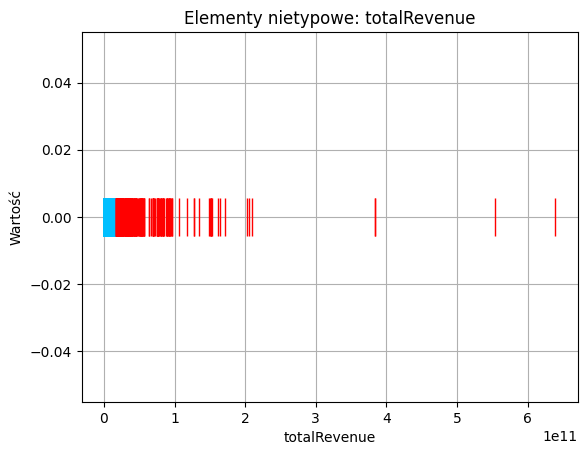

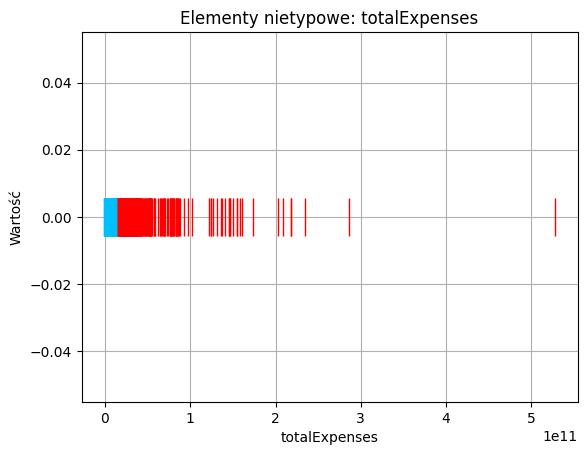

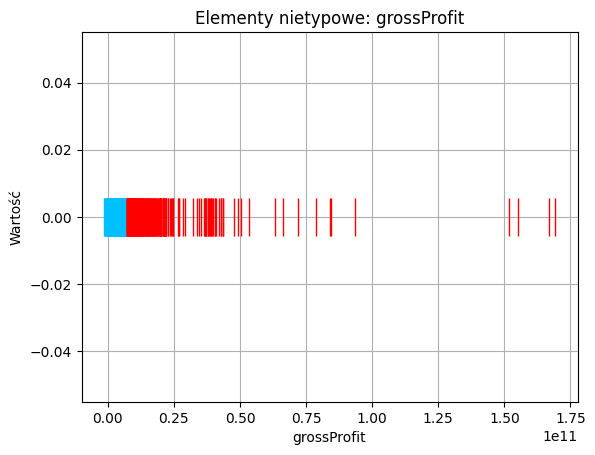

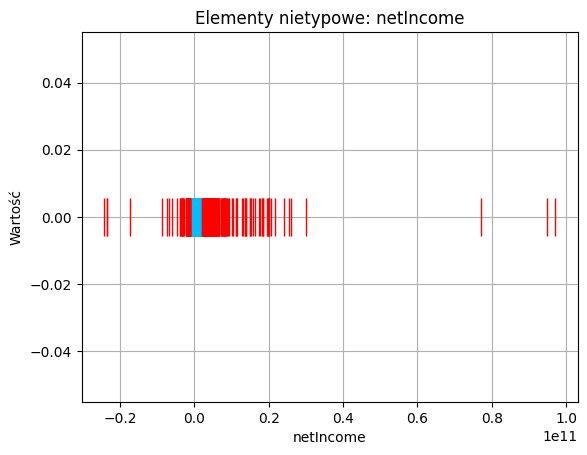

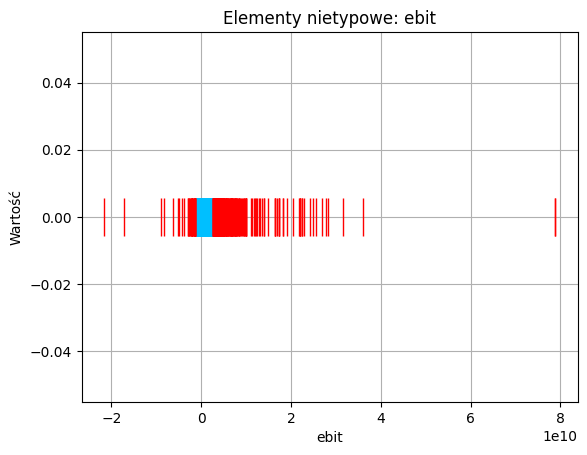

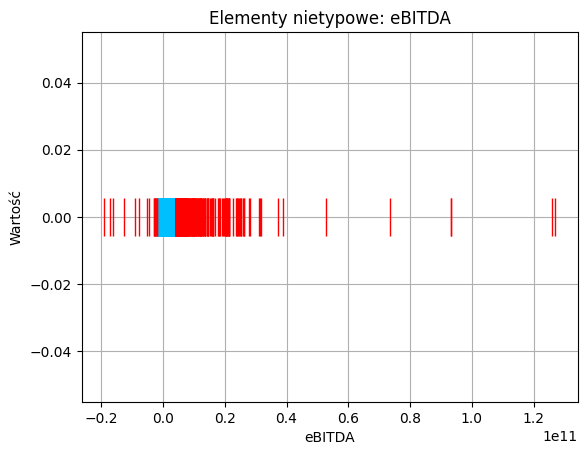

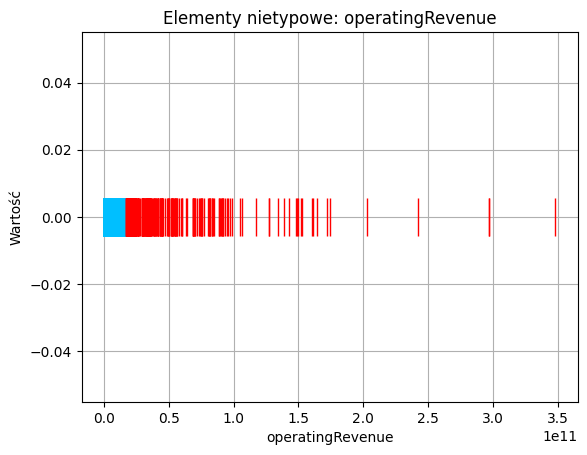

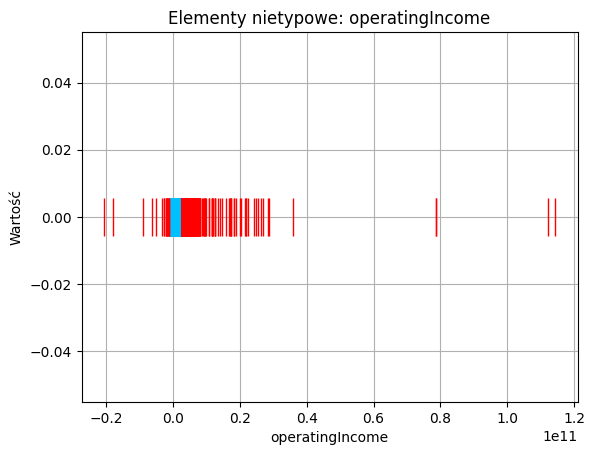

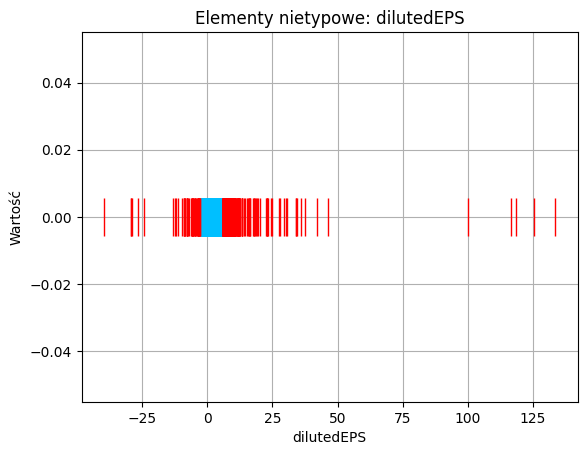

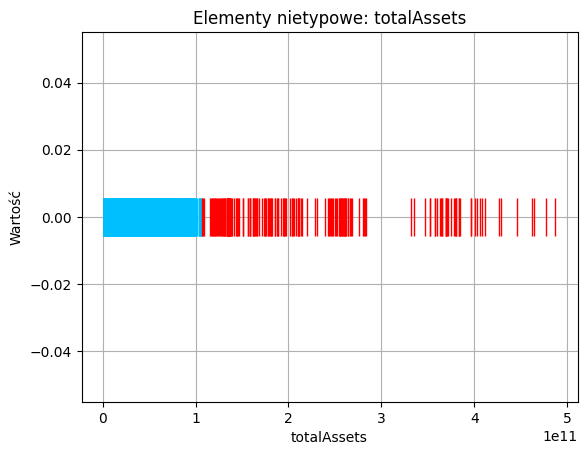

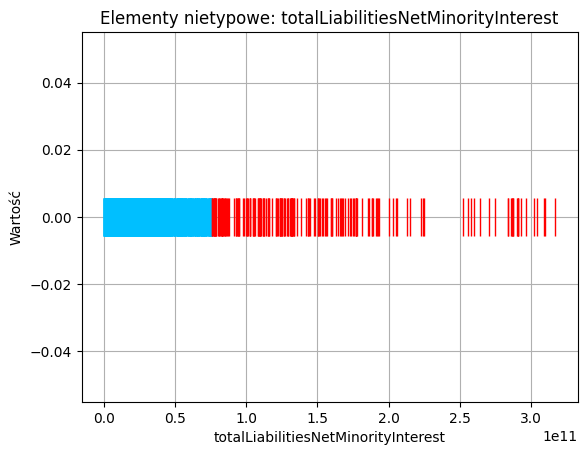

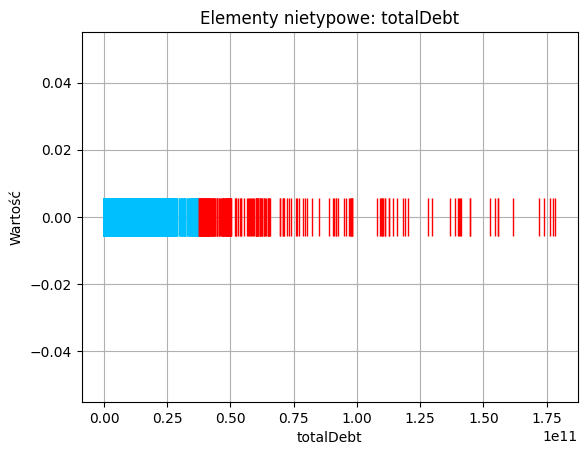

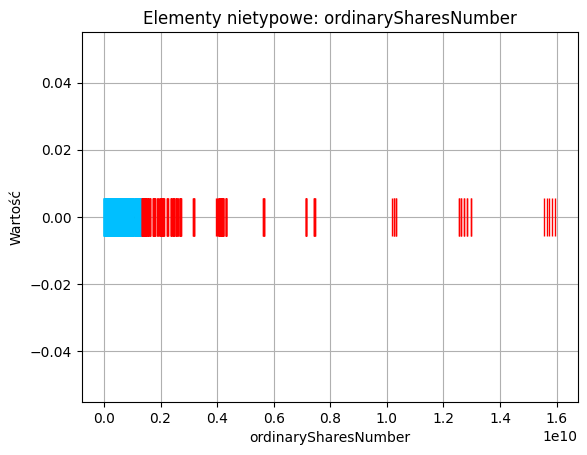

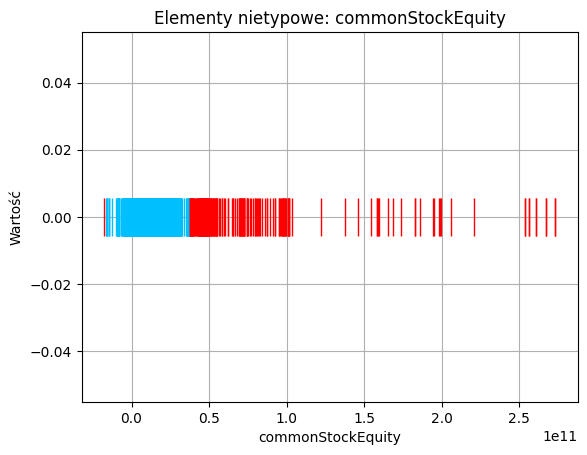

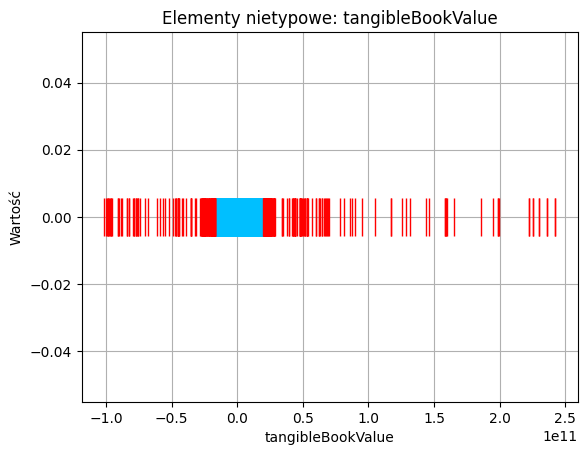

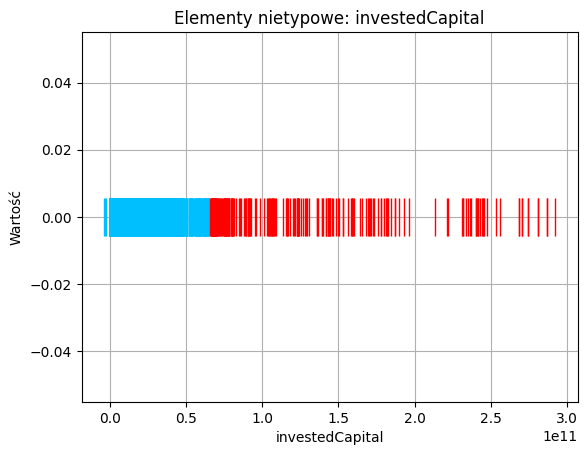

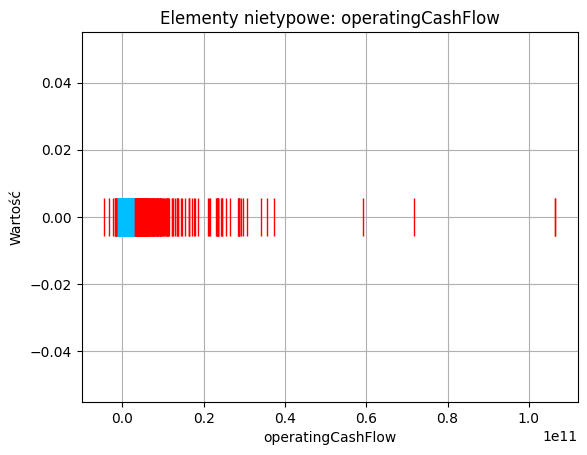

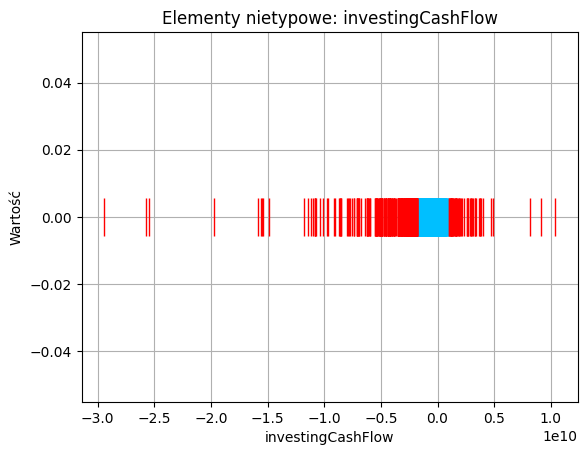

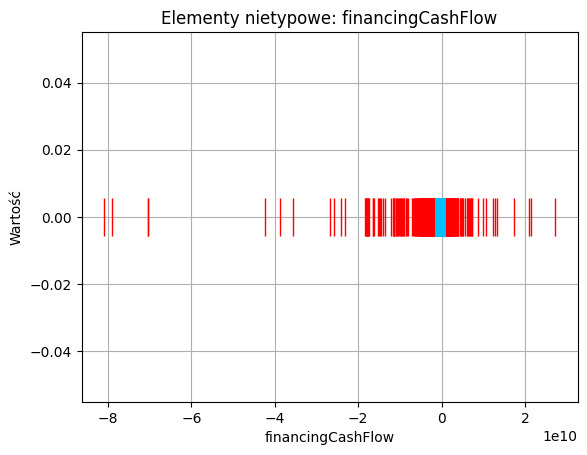

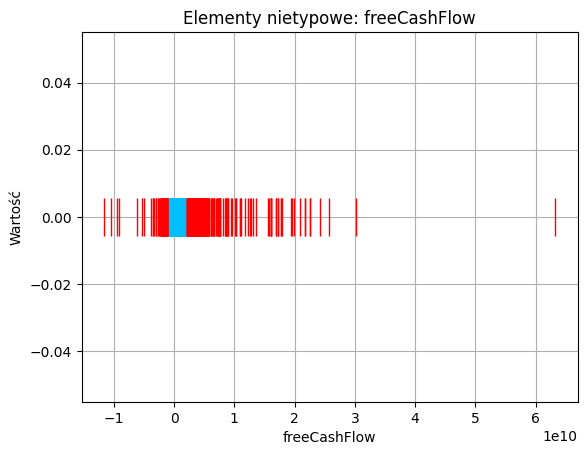

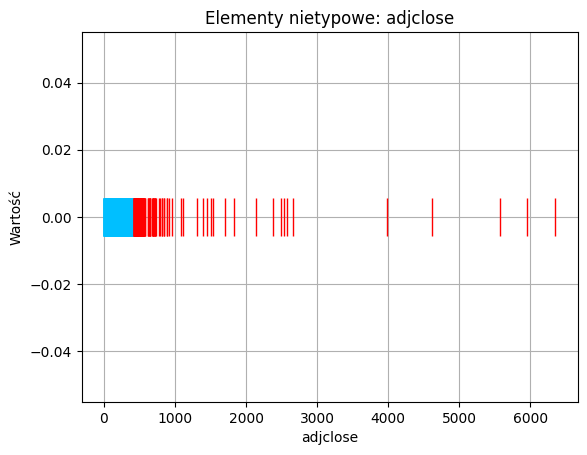

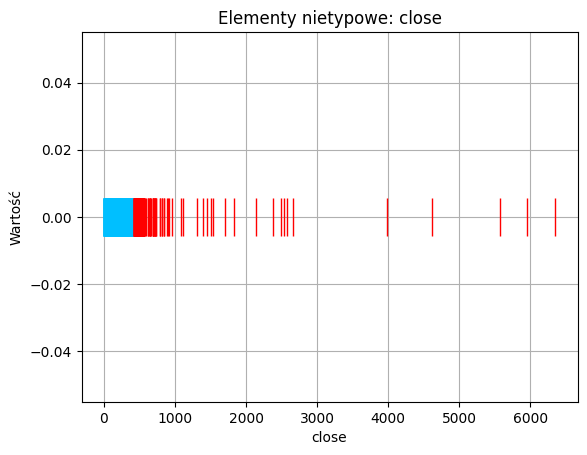

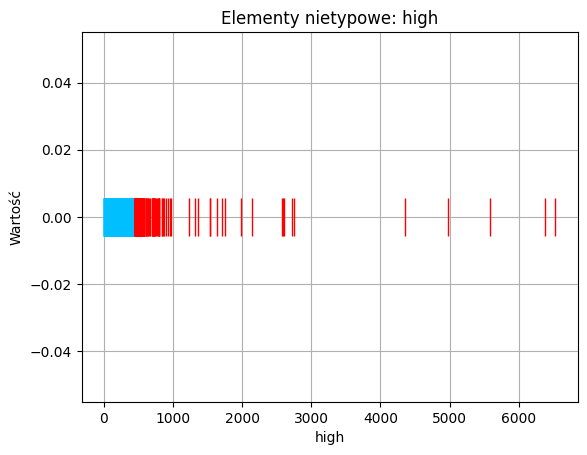

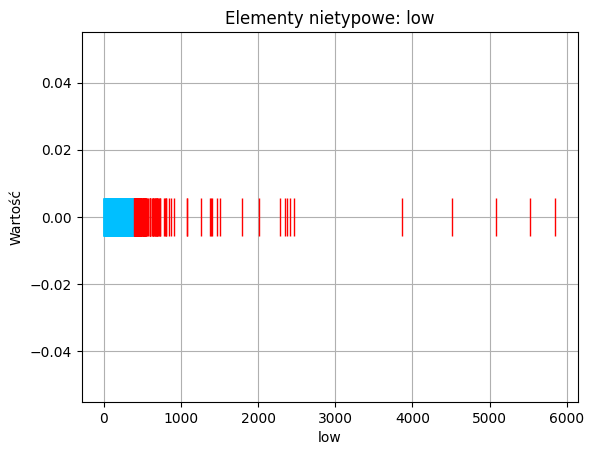

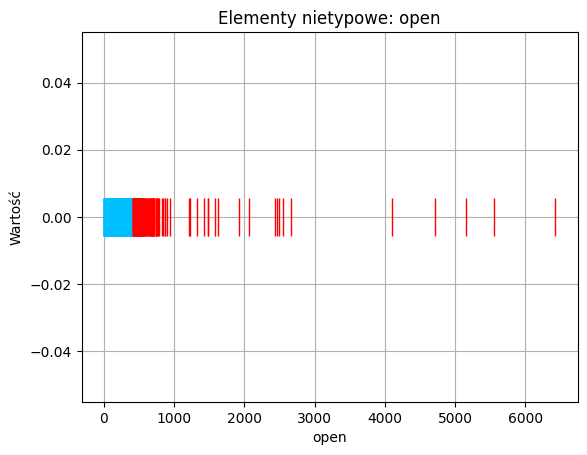

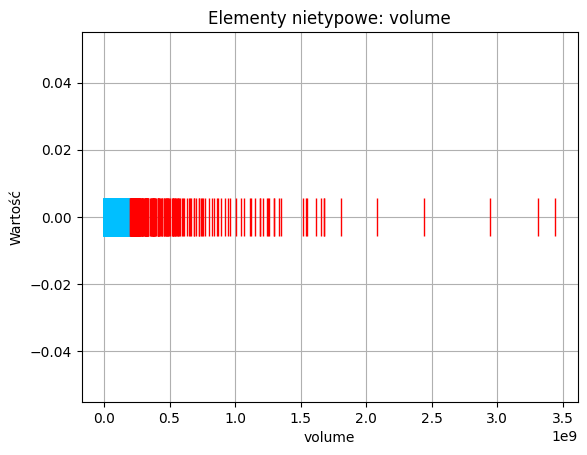

In [103]:
from itertools import islice

for name, values in islice(quarter_full_df.items(), 2, None):
  elementy_nietypowe(name)

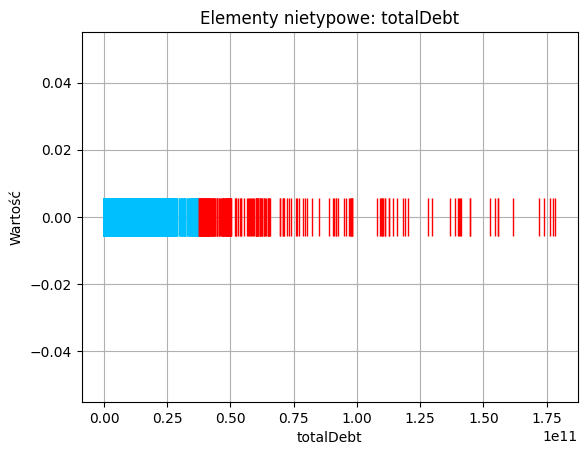

In [98]:
elementy_nietypowe('totalDebt')